# Spatial Joins

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Census Tracts

Use [Census Reporter](https://censusreporter.org/) to grab census data at the tract level.

In [2]:
tracts = gpd.read_file('trans.geojson')

In [3]:
tracts.head()

geoid                                   name  B08105A001  \
0        05000US06037                 Los Angeles County, CA   2481868.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA      1465.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA      1656.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA      2131.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA      1063.0   

   B08105A001, Error  B08105A002  B08105A002, Error  B08105A003  \
0             9861.0   1852703.0             8684.0    214006.0   
1              285.0      1216.0              265.0       108.0   
2              234.0      1466.0              253.0       107.0   
3              451.0      1785.0              365.0       166.0   
4              185.0       836.0              165.0       111.0   

   B08105A003, Error  B08105A004  B08105A004, Error  B08105A005  \
0             3832.0    119542.0             2376.0     69536.0   
1               57.0        23.0               29.0         0.0   
2               98.0         0.0               12.0        11.0   
3              145.0        50.0               52.0        33.0   
4               66.0        18.0               20.0         0.0   

   B08105A005, Error  B08105A006  B08105A006, Error  B08105A007  \
0             1837.0     62391.0             1750.0    163690.0   
1               12.0        20.0               30.0        98.0   
2               17.0         7.0               11.0        65.0   
3               37.0        47.0               53.0        50.0   
4               12.0        23.0               35.0        75.0   

   B08105A007, Error                                           geometry  
0             3133.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1               53.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2               38.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3               62.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4               51.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...

In [4]:
# first row is the total for the county so drop it
tracts=tracts.drop([0])

In [5]:
tracts.shape

(2346, 17)

In [6]:
# look at tracts data again
tracts.head()

geoid                                   name  B08105A001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA      1465.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA      1656.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA      2131.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA      1063.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA      1771.0   

   B08105A001, Error  B08105A002  B08105A002, Error  B08105A003  \
1              285.0      1216.0              265.0       108.0   
2              234.0      1466.0              253.0       107.0   
3              451.0      1785.0              365.0       166.0   
4              185.0       836.0              165.0       111.0   
5              211.0      1382.0              176.0       134.0   

   B08105A003, Error  B08105A004  B08105A004, Error  B08105A005  \
1               57.0        23.0               29.0         0.0   
2               98.0         0.0               12.0        11.0   
3              145.0        50.0               52.0        33.0   
4               66.0        18.0               20.0         0.0   
5              103.0        86.0              100.0         0.0   

   B08105A005, Error  B08105A006  B08105A006, Error  B08105A007  \
1               12.0        20.0               30.0        98.0   
2               17.0         7.0               11.0        65.0   
3               37.0        47.0               53.0        50.0   
4               12.0        23.0               35.0        75.0   
5               12.0         0.0               12.0       169.0   

   B08105A007, Error                                           geometry  
1               53.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2               38.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3               62.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4               51.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5               88.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

What is the metadata?
- [metadata](metadata.json)

In [7]:
# columns
tracts.columns.to_list()

['geoid',
 'name',
 'B08105A001',
 'B08105A001, Error',
 'B08105A002',
 'B08105A002, Error',
 'B08105A003',
 'B08105A003, Error',
 'B08105A004',
 'B08105A004, Error',
 'B08105A005',
 'B08105A005, Error',
 'B08105A006',
 'B08105A006, Error',
 'B08105A007',
 'B08105A007, Error',
 'geometry']

In [8]:
# human readable column names
tracts.columns=['geoid',
 'name',
 'Total',
 'Total, Error',
 'Drove alone',
 'Drove alone, Error',
 'Carpooled',
 'Carpooled, Error',
 'Public transportation',
 'Public transportation, Error',
 'Walked',
 'Walked, Error',
 'Other',
 'Other, Error',
 'Worked from home',
 'Worked from home, Error',
 'geometry']

In [9]:
tracts.sample()

geoid                                name  Total  \
747  14000US06037234000  Census Tract 2340, Los Angeles, CA  732.0   

     Total, Error  Drove alone  Drove alone, Error  Carpooled  \
747         174.0        480.0               139.0       68.0   

     Carpooled, Error  Public transportation  Public transportation, Error  \
747              64.0                   59.0                          42.0   

     Walked  Walked, Error  Other  Other, Error  Worked from home  \
747    22.0           33.0   75.0          49.0              28.0   

     Worked from home, Error  \
747                     41.0   

                                              geometry  
747  MULTIPOLYGON (((-118.32752 34.01968, -118.3251...

## Map plot

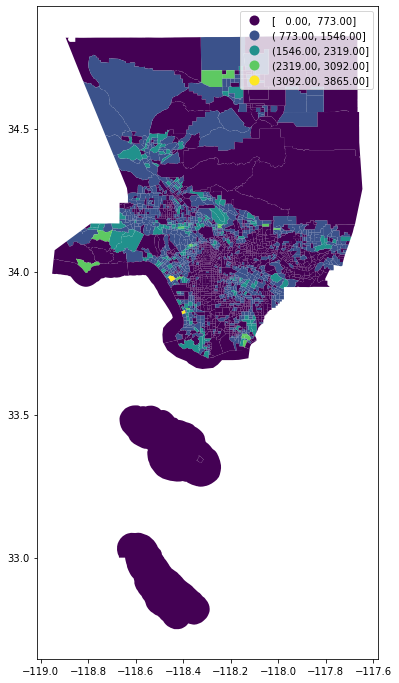

In [10]:
tracts.plot(figsize=(12,12),column='Drove alone',legend=True,scheme='equal_interval')

## LA Neighborhoods

Bring in Neighborhoods from the LA Times


In [11]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

What are the coordinate systems of both our datasets?

In [12]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

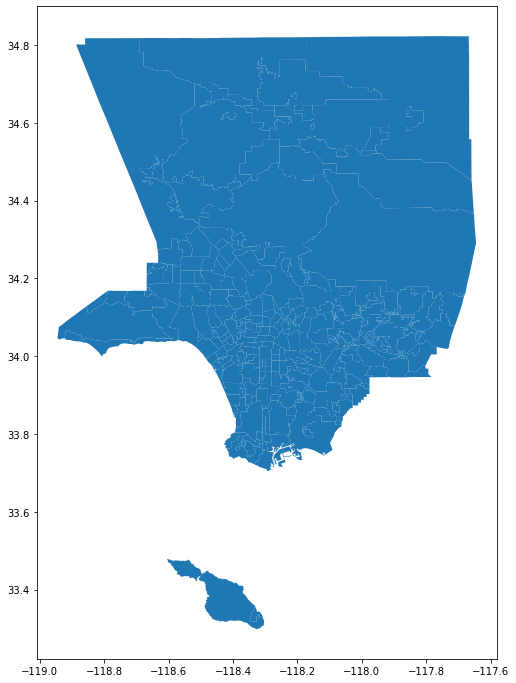

In [14]:
neighborhoods.plot(figsize=(12,12))

## Unique neighborhoods

In [15]:
neighborhoods.name.unique()

array(['Acton', 'Adams-Normandie', 'Agoura Hills', 'Agua Dulce',
       'Alhambra', 'Alondra Park', 'Altadena', 'Angeles Crest', 'Arcadia',
       'Arleta', 'Arlington Heights', 'Artesia', 'Athens',
       'Atwater Village', 'Avalon', 'Avocado Heights', 'Azusa',
       'Baldwin Hills/Crenshaw', 'Baldwin Park', 'Bel-Air', 'Bellflower',
       'Bell Gardens', 'Bell', 'Beverly Crest', 'Beverly Grove',
       'Beverly Hills', 'Beverlywood', 'Boyle Heights', 'Bradbury',
       'Brentwood', 'Broadway-Manchester', 'Burbank', 'Calabasas',
       'Canoga Park', 'Carson', 'Carthay', 'Castaic Canyons', 'Castaic',
       'Central-Alameda', 'Century City', 'Cerritos', 'Charter Oak',
       'Chatsworth', 'Chatsworth Reservoir', 'Chesterfield Square',
       'Cheviot Hills', 'Chinatown', 'Citrus', 'Claremont', 'Commerce',
       'Compton', 'Covina', 'Cudahy', 'Culver City', 'Cypress Park',
       'Del Aire', 'Del Rey', 'Desert View Highlands', 'Diamond Bar',
       'Downey', 'Downtown', 'Duarte', 'Ea

## Interactive map of neighborhoods

In [16]:
# interactive plot
import plotly.express as px


In [17]:
fig = px.choropleth(neighborhoods,
                   geojson=neighborhoods.geometry,
                   locations=neighborhoods.index,
                   hover_name="name")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

## One neighborhood at a time

In [18]:
neighborhoods[neighborhoods.name=='Westwood']

kind external_id      name  \
264  L.A. County Neighborhood (V5)    westwood  Westwood   

                                   slug  \
264  westwood-la-county-neighborhood-v5   

                                               set  \
264  /1.0/boundary-set/la-county-neighborhoods-v5/   

                                              metadata  \
264  {'sqmi': 3.6757772963, 'type': 'segment-of-a-c...   

                                          resource_uri  \
264  /1.0/boundary/westwood-la-county-neighborhood-v5/   

                                              geometry  
264  MULTIPOLYGON (((-118.42991 34.07931, -118.4290...

In [19]:
westwood = neighborhoods[neighborhoods.name=='Westwood']

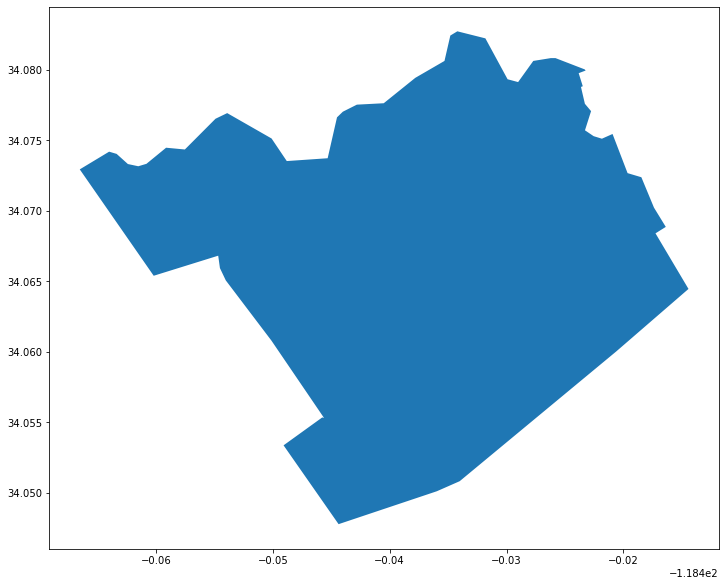

In [20]:
westwood.plot(figsize=(12,12))

## Spatial join: find census tracts within a neighborhood

In [21]:
tracts_in_neighborhood = gpd.sjoin(tracts, westwood, how="inner", op='intersects')

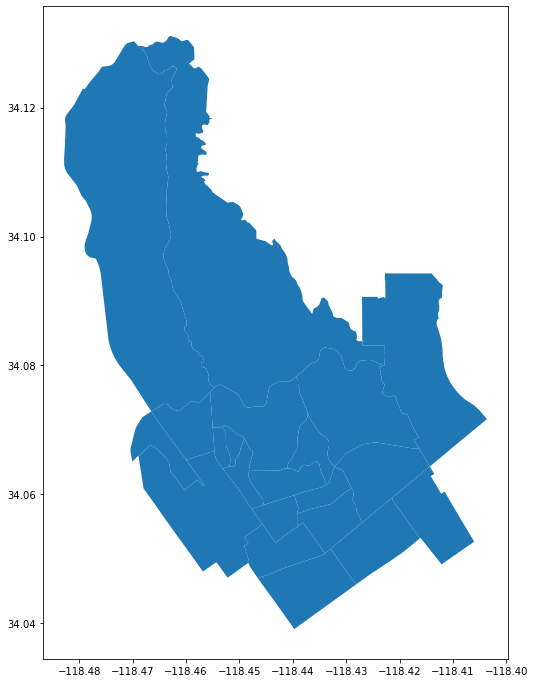

In [22]:
tracts_in_neighborhood.plot(figsize=(12,12))

Hmmm, why did it create that shape? What is the logic behind what it chooses to spatially join?

## Using centroids

In [23]:
# how about centroids?
tracts['centroid'] = tracts['geometry'].centroid

<ipython-input-23-169c21d0585e>:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [24]:
tracts.head()

geoid                                   name   Total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1465.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1656.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2131.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1063.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  1771.0   

   Total, Error  Drove alone  Drove alone, Error  Carpooled  Carpooled, Error  \
1         285.0       1216.0               265.0      108.0              57.0   
2         234.0       1466.0               253.0      107.0              98.0   
3         451.0       1785.0               365.0      166.0             145.0   
4         185.0        836.0               165.0      111.0              66.0   
5         211.0       1382.0               176.0      134.0             103.0   

   Public transportation  Public transportation, Error  Walked  Walked, Error  \
1                   23.0                          29.0     0.0           12.0   
2                    0.0                          12.0    11.0           17.0   
3                   50.0                          52.0    33.0           37.0   
4                   18.0                          20.0     0.0           12.0   
5                   86.0                         100.0     0.0           12.0   

   Other  Other, Error  Worked from home  Worked from home, Error  \
1   20.0          30.0              98.0                     53.0   
2    7.0          11.0              65.0                     38.0   
3   47.0          53.0              50.0                     62.0   
4   23.0          35.0              75.0                     51.0   
5    0.0          12.0             169.0                     88.0   

                                            geometry  \
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...   
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...   
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...   
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...   

                      centroid  
1  POINT (-118.29299 34.25947)  
2  POINT (-118.29015 34.26772)  
3  POINT (-118.29073 34.25297)  
4  POINT (-118.28163 34.25161)  
5  POINT (-118.27100 34.24877)

In [25]:
# switch the geometry column from polygon to centroid
tracts = tracts.set_geometry('centroid')

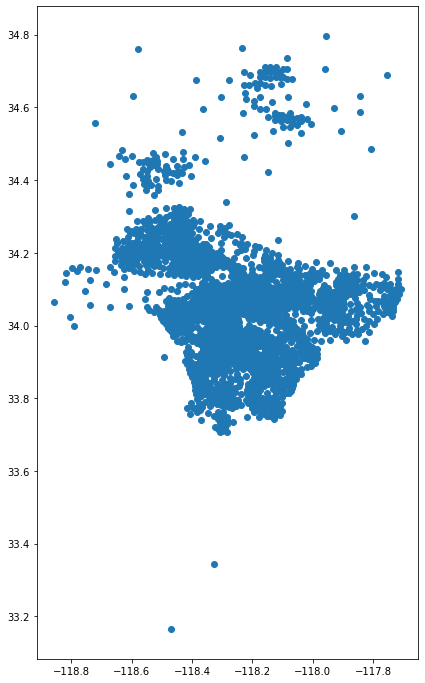

In [26]:
tracts.plot(figsize=(12,12))

In [27]:
# repeat the join
tracts_in_neighborhood = gpd.sjoin(tracts, westwood, how="inner", op='intersects')

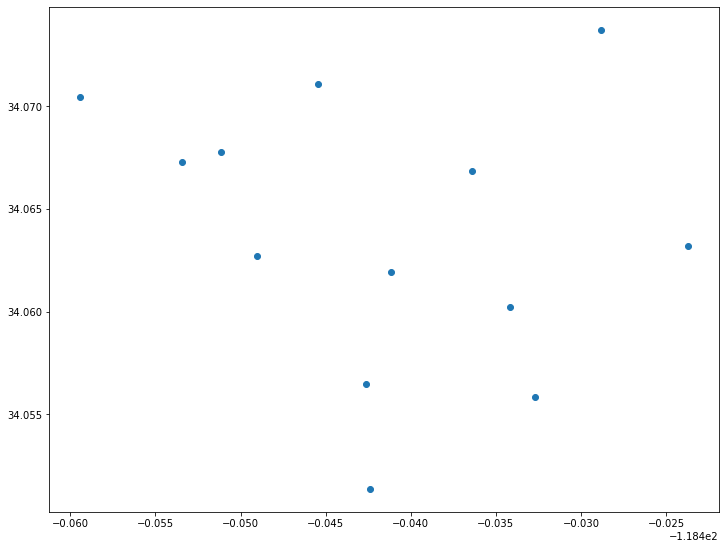

In [28]:
tracts_in_neighborhood.plot(figsize=(12,12))

In [29]:
# put the geometry back to polygon
tracts_in_neighborhood = tracts_in_neighborhood.set_geometry('geometry')

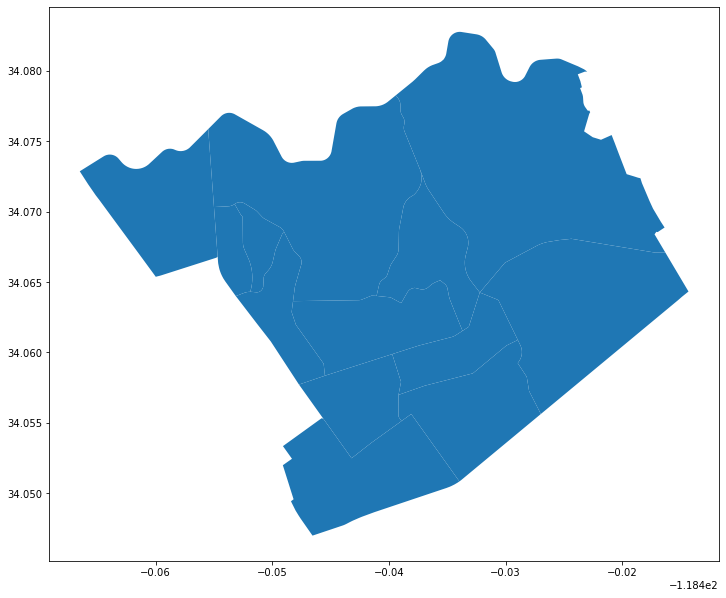

In [30]:
tracts_in_neighborhood.plot(figsize=(12,12))

## Create a function

In [31]:
# create a function
def neighborhood_tracts(name='Westwood'):
    # subset neighborhoods by name
    neighborhood = neighborhoods[neighborhoods.name==name]
    
    # spatial join to get tracts within the neighborhood
    tracts_in_neighborhood = gpd.sjoin(tracts,neighborhood, how="inner", op='intersects')
    
    # reset geometry to column
    tracts_in_neighborhood = tracts_in_neighborhood.set_geometry('geometry')
    
    # return it
    return tracts_in_neighborhood

In [32]:
downtown = neighborhood_tracts('Downtown')

In [33]:
santa_monica = neighborhood_tracts('Santa Monica')

# Spatial Autocorrelation

Tobler's law:

How similar are census tracts to their neighbors based on their usage of public transportation?

In [34]:
import esda
from esda.moran import Moran, Moran_Local

In [35]:
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster

import libpysal as lps

To calculate Queen contiguity spatial weights, we use Pysal.

In [36]:
w =  lps.weights.Queen.from_dataframe(tracts)
w.transform = 'r'

/opt/conda/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.



## Spatial Weights and Spatial Lag
Spatial weights are how we determine the area’s neighborhood. There are different statistical methods that are used for determining spatial weights, and it is beyond this to provide an in-depth explanation of each in this article. One of the most commonly used spatial weights methods is Queen Contiguity Matrix, which we use. Here is a diagram explaining how the Queen contiguity matrix works ( included also is the rook contiguity matrix)

![Queen](https://www.researchgate.net/profile/Matthew_Tenney/publication/304782766/figure/fig8/AS:380175423426567@1467652292591/Rooks-vs-Queens-Contiguity.png)

Next, calculate the spatial lag. In other words, get the average of the values from neighoring tracts as defined by the contiguity weights above.

In [37]:
tracts['w_public'] = lps.weights.lag_spatial(w, tracts['Public transportation'])

In [55]:
tracts[['Public transportation','w_public']].sample(5)

Public transportation   w_public
1085                   13.0  45.000000
1183                    6.0  27.250000
173                    10.0  96.600000
473                    62.0  66.000000
1374                   60.0  41.166667

In [56]:
px.scatter(tracts,x='Public transportation',y='w_public')

## Global Spatial Autocorrelation
Global spatial autocorrelation determines the overall pattern in the dataset. Here we can calculate if there is a trend and summarize the variable of interest. Moran’s I statistics is typically used to determine the global spatial autocorrelation, so let us calculate that.


In [40]:
y = tracts['Public transportation']
moran = Moran(y, w)
moran.I

0.46319927200351285

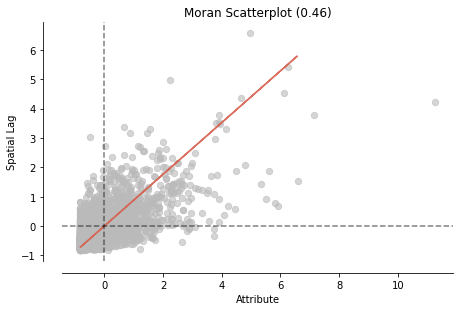

In [41]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

## Local Spatial Autocorrelation
So far, we have only determined that there is a positive spatial autocorrelation between the price of properties in neighborhoods and their locations. But we have not detected where clusters are. Local Indicators of Spatial Association (LISA) is used to do that. LISA classifies areas into four groups: high values near to high values (HH), Low values with nearby low values (LL), Low values with high values in its neighborhood, and vice-versa.
We had already calculated the weights (w) and determined the price as our variable of interest(y). To calculate Moran Local, we use Pysal’s functionality.

In [42]:
# calculate Moran Local 
m_local = Moran_Local(y, w)

And plot Moran’s Local Scatter Plot.

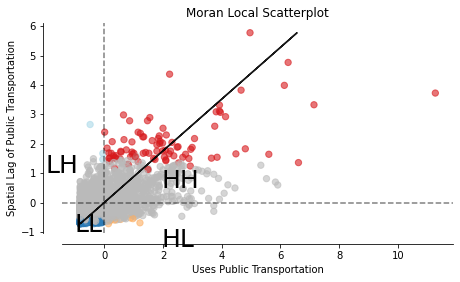

In [43]:
# Plot
fig, ax = moran_scatterplot(m_local, p=0.005)
ax.set_xlabel('Uses Public Transportation')
ax.set_ylabel('Spatial Lag of Public Transportation')
plt.text(1.95, 0.5, 'HH', fontsize=25)
plt.text(1.95, -1.5, 'HL', fontsize=25)
plt.text(-2, 1, 'LH', fontsize=25)
plt.text(-1, -1, 'LL', fontsize=25)
plt.show()

In [44]:
from splot.esda import lisa_cluster

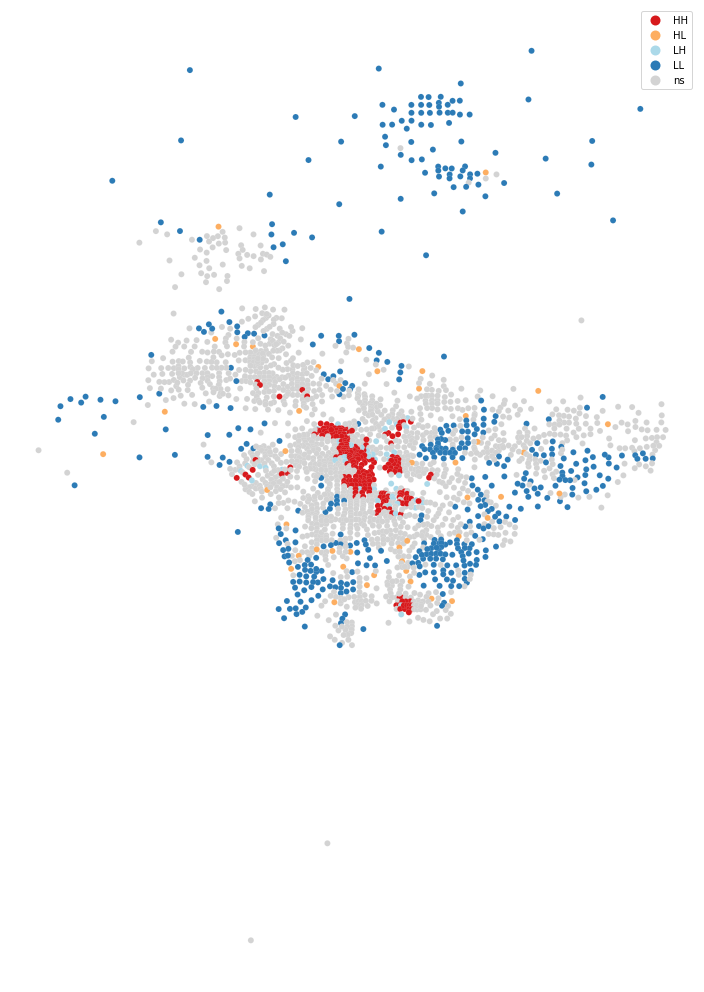

In [45]:
lisa_cluster(m_local, tracts, p=0.05, figsize = (18,18))
plt.show()

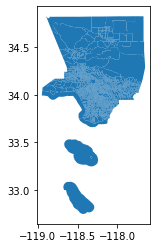

In [46]:
# prefer a choropleth?
tracts = tracts.set_geometry('geometry')
tracts.plot()

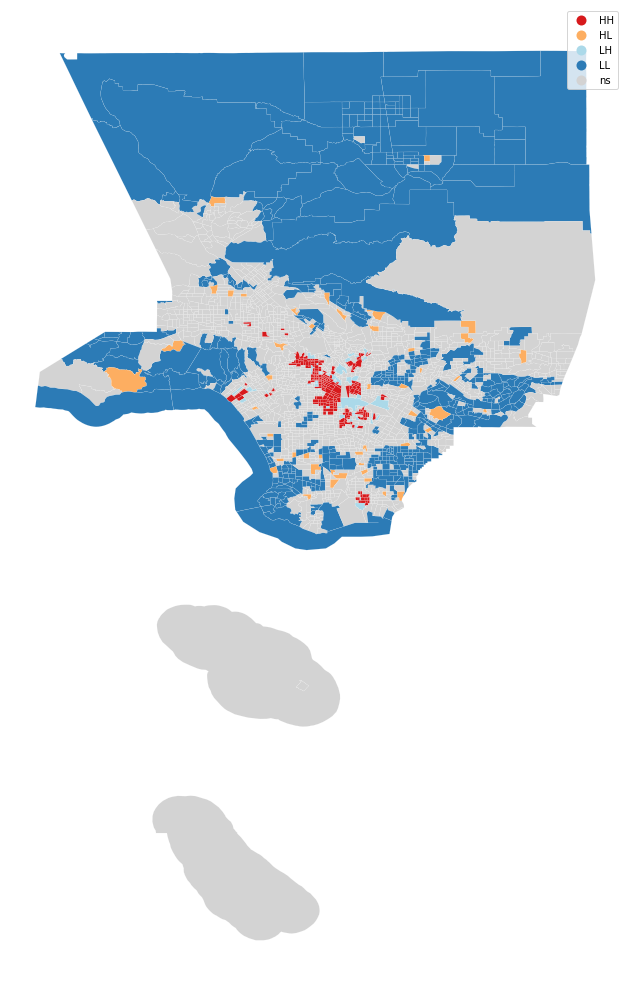

In [47]:
fig,ax = lisa_cluster(m_local, tracts, p=0.05, figsize = (18,18))
# plt.show()

In [48]:
from splot.esda import plot_local_autocorrelation

(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f370b010280>,
       dtype=object))

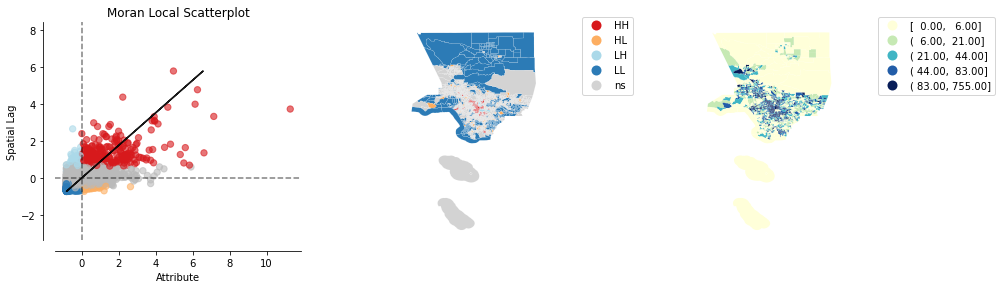

In [49]:
plot_local_autocorrelation(m_local, tracts, 'Public transportation')

In [50]:
def SA_by_neighborhood(name,variable):
    neighborhood = neighborhood_tracts(name)
    w =  lps.weights.Queen.from_dataframe(neighborhood)
    w.transform = 'r'
    y = neighborhood[variable]
    moran = Moran(y, w)
    moran.I
    # calculate Moran Local 
    m_local = Moran_Local(y, w)
    plot_local_autocorrelation(m_local, neighborhood, variable)
    

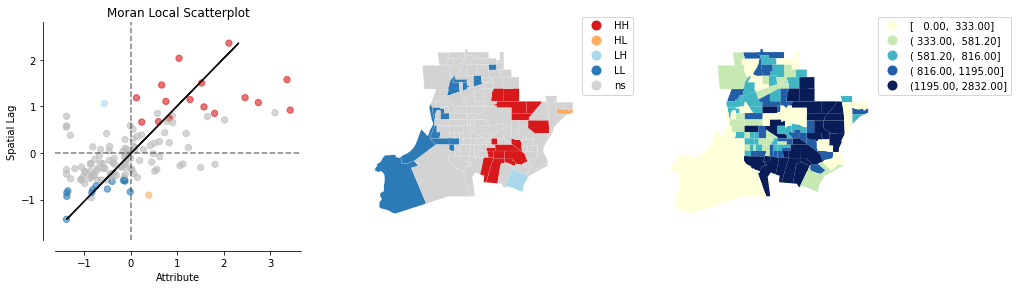

In [52]:
SA_by_neighborhood('Long Beach',variable='Drove alone')

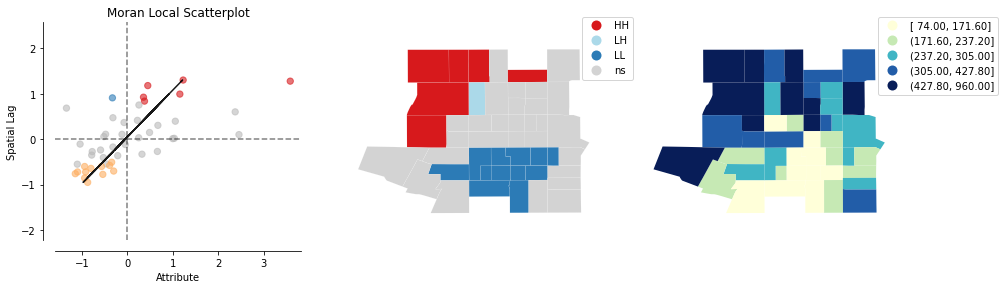

In [53]:
SA_by_neighborhood('Koreatown',variable='Drove alone')